In [1]:
import os

import torchaudio
import torch
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data

In [2]:
def load_audio_files(path: str, label: str):
    # Initialize an empty list to store the dataset
    dataset = []

    # List all WAV files in the specified path
    walker = sorted(str(p) for p in Path(path).glob('*.wav'))

    # Iterate over the list of audio file paths
    for i, file_path in enumerate(walker):
        # Split the file path into directory and filename
        path, filename = os.path.split(file_path)
        name, _ = os.path.splitext(filename)

        # Load the audio waveform and sample rate using torchaudio
        waveform, sample_rate = torchaudio.load(file_path)

        # Create an entry for the dataset, including waveform, sample rate, label, and ID
        entry = {'waveform': waveform, 'sample_rate': sample_rate, 'label': label, 'id': i}

        # Append the entry to the dataset list
        dataset.append(entry)

    # Return the populated dataset
    return dataset

In [3]:
# Load audio files from the 'Data/Screaming' directory with the label 'yes'
screaming_dataset = load_audio_files('/kaggle/input/human-screaming-detection-dataset/Screaming', 'yes')

# Display the 'screaming_dataset' which contains loaded audio data
screaming_dataset[:5]

[{'waveform': tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0573, 0.1068, 0.0877],
          [0.0000, 0.0000, 0.0000,  ..., 0.0573, 0.1068, 0.0877]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 0},
 {'waveform': tensor([[-0.2336, -0.2152, -0.1715,  ..., -0.1474, -0.1485, -0.1496],
          [-0.2410, -0.2266, -0.2237,  ..., -0.0788, -0.0812, -0.0795]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 1},
 {'waveform': tensor([[0.0976, 0.1692, 0.2065,  ..., 0.1551, 0.2217, 0.2664],
          [0.1116, 0.1799, 0.2049,  ..., 0.1391, 0.2158, 0.2742]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 2},
 {'waveform': tensor([[-0.6388, -0.6234, -0.4489,  ..., -0.2263, -0.2391, -0.2776],
          [-0.6207, -0.6150, -0.4537,  ..., -0.1915, -0.2045, -0.2404]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 3},
 {'waveform': tensor([[-1.7645e-01, -2.0004e-01, -2.0139e-01,  ..., -6.1035e-05,
           -6.1035e-05, -6.1035e-05]]),
  'sample_rate': 44100,
  'label': 'yes',
  'id': 4}]

In [4]:
# Load audio files from the 'Data/NotScreaming' directory with the label 'not'
not_screaming_dataset = load_audio_files('/kaggle/input/human-screaming-detection-dataset/NotScreaming', 'not')

# Display the 'screaming_dataset' which contains loaded audio data
not_screaming_dataset[:5]

[{'waveform': tensor([[-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374],
          [-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374]]),
  'sample_rate': 44100,
  'label': 'not',
  'id': 0},
 {'waveform': tensor([[-0.0004, -0.0004, -0.0002,  ...,  0.0002, -0.0002, -0.0005],
          [-0.0004, -0.0004, -0.0002,  ...,  0.0002, -0.0002, -0.0005]]),
  'sample_rate': 44100,
  'label': 'not',
  'id': 1},
 {'waveform': tensor([[-0.0060, -0.0005,  0.0016,  ..., -0.0117, -0.0117, -0.0127],
          [-0.0154, -0.0064, -0.0031,  ..., -0.0116, -0.0118, -0.0125]]),
  'sample_rate': 44100,
  'label': 'not',
  'id': 2},
 {'waveform': tensor([[ 0.0067,  0.0037, -0.0010,  ...,  0.0002,  0.0002,  0.0002],
          [ 0.0062,  0.0032, -0.0014,  ...,  0.0002,  0.0002,  0.0002]]),
  'sample_rate': 44100,
  'label': 'not',
  'id': 3},
 {'waveform': tensor([[-0.0518, -0.0407, -0.0268,  ..., -0.0185, -0.0204, -0.0233],
          [-0.0801, -0.0845, -0.0880,  ..., -0.0625, -0.0641, -0.065

In [5]:
display(len(screaming_dataset), len(not_screaming_dataset))

862

2631

# Check the sample of the data

In [6]:
scream_id = 5
no_scream_id = 0

# Access the waveform and sample rate of the first entry in the 'screaming_dataset'
screaming_waveform = screaming_dataset[scream_id]['waveform']
screaming_sample_rate = screaming_dataset[scream_id]['sample_rate']

# Print the waveform, sample rate, label, and ID of the first entry
print(f'Screaming Waveform: {screaming_waveform}')
print(f'Screaming Sample Rate: {screaming_sample_rate}')
print(f'Screaming Label: {screaming_dataset[scream_id]["label"]}')
print(f'Screaming ID: {screaming_dataset[scream_id]["id"]} \n')

# Access the waveform and sample rate of the first entry in the 'screaming_dataset'
not_screaming_waveform = not_screaming_dataset[no_scream_id]['waveform']
not_screaming_sample_rate = not_screaming_dataset[no_scream_id]['sample_rate']

# Print the waveform, sample rate, label, and ID of the first entry
print(f'Screaming Waveform: {not_screaming_waveform}')
print(f'Screaming Sample Rate: {not_screaming_sample_rate}')
print(f'Screaming Label: {not_screaming_dataset[no_scream_id]["label"]}')
print(f'Screaming ID: {not_screaming_dataset[no_scream_id]["id"]} \n')

Screaming Waveform: tensor([[ 0.0032, -0.0081, -0.0218,  ..., -0.0014, -0.0021, -0.0023],
        [ 0.0032, -0.0081, -0.0218,  ..., -0.0014, -0.0021, -0.0023]])
Screaming Sample Rate: 44100
Screaming Label: yes
Screaming ID: 5 

Screaming Waveform: tensor([[-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374],
        [-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374]])
Screaming Sample Rate: 44100
Screaming Label: not
Screaming ID: 0 



In [7]:
def show_waveform(waveform, sample_rate, label):
    # Print information about the waveform, sample rate, and label
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))

    # Calculate the new sample rate by dividing the original sample rate by 10
    new_sample_rate = sample_rate / 10

    # Resample applies to a single channel, so we resample the first channel here
    channel = 0

    # Apply resampling to the waveform
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel, :].view(1, -1))

    # Print the shape of the transformed waveform and the new sample rate
    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    # Plot the transformed waveform
    plt.figure()
    plt.plot(waveform_transformed[0, :].numpy())

Waveform: tensor([[ 0.0032, -0.0081, -0.0218,  ..., -0.0014, -0.0021, -0.0023],
        [ 0.0032, -0.0081, -0.0218,  ..., -0.0014, -0.0021, -0.0023]])
Sample rate: 44100
Labels: yes 

Shape of transformed waveform: torch.Size([1, 44100])
Sample rate: 4410.0


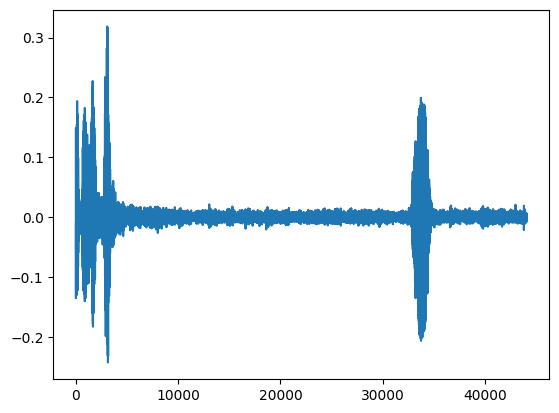

In [8]:
show_waveform(screaming_waveform, screaming_sample_rate, 'yes')

In [9]:
import IPython.display as ipd

# Plat the sample sound
ipd.Audio(screaming_waveform.numpy(), rate=screaming_sample_rate)

Waveform: tensor([[-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374],
        [-0.0436, -0.0533, -0.0568,  ...,  0.0986,  0.1464,  0.1374]])
Sample rate: 44100
Labels: not 

Shape of transformed waveform: torch.Size([1, 44100])
Sample rate: 4410.0


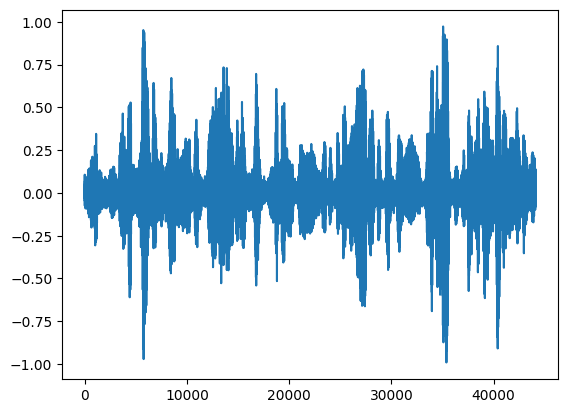

In [10]:
show_waveform(not_screaming_waveform, not_screaming_sample_rate, 'not')

In [11]:
# Plat the sample sound
ipd.Audio(not_screaming_waveform.numpy(), rate=not_screaming_sample_rate)

# View with spectrogram

In [12]:
def show_spectrogram(waveform_classA, waveform_classB):
    # Compute the spectrogram for the first waveform (class A)
    yes_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of yes spectrogram: {}".format(yes_spectrogram.size()))

    # Compute the spectrogram for the second waveform (class B)
    no_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of no spectrogram: {}".format(no_spectrogram.size()))

    # Create a figure with two subplots for visualization
    plt.figure()

    # Plot the spectrogram of class A (left subplot)
    plt.subplot(1, 2, 1)
    plt.title("Features of {}".format('yes'))

    # Set the aspect ratio to 'auto' for the y-axis to elongate it
    plt.imshow(yes_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

    # Plot the spectrogram of class B (right subplot)
    plt.subplot(1, 2, 2)
    plt.title("Features of {}".format('no'))

    # Set the aspect ratio to 'auto' for the y-axis to elongate it
    plt.imshow(no_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')


Shape of yes spectrogram: torch.Size([2, 201, 2206])
Shape of no spectrogram: torch.Size([2, 201, 2206])


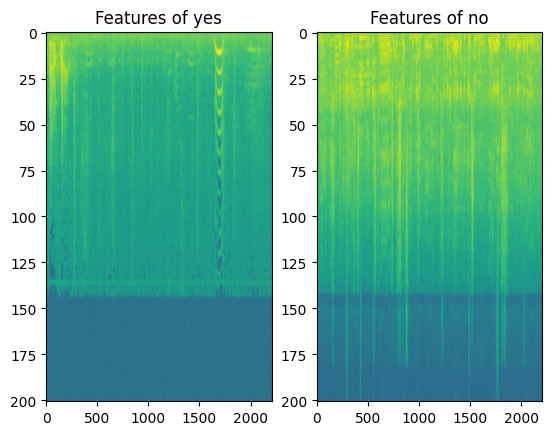

In [13]:
show_spectrogram(screaming_waveform, not_screaming_waveform)

In [14]:
def show_mel_spectrogram(waveform, sample_rate):
    # Compute the Mel spectrogram from the input waveform
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate,
            n_mels=64,
            n_fft=1024
    )(waveform)

    # Print the shape of the Mel spectrogram
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    # Create a new figure for visualization
    plt.figure()

    # Display the Mel spectrogram as an image with a color map 'viridis'
    plt.imshow(mel_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

Shape of spectrogram: torch.Size([2, 64, 862])


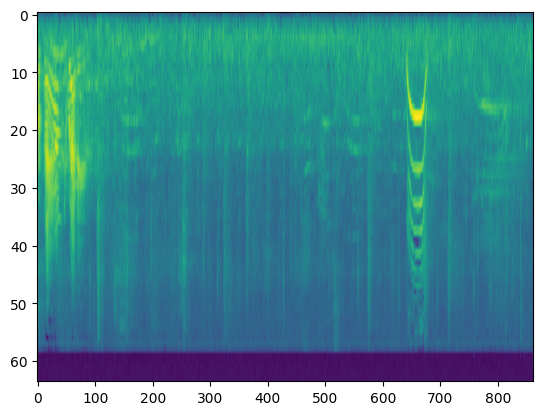

In [15]:
show_mel_spectrogram(screaming_waveform, screaming_sample_rate)

Shape of spectrogram: torch.Size([2, 64, 862])


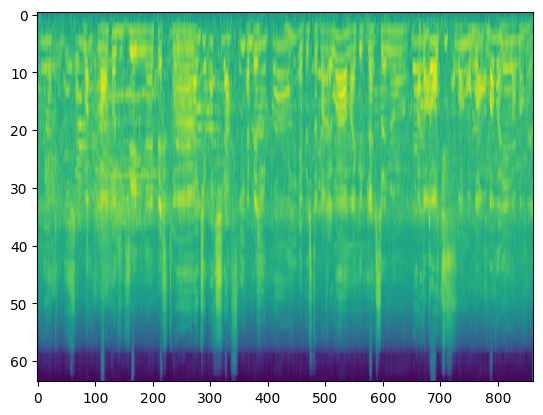

In [16]:
show_mel_spectrogram(not_screaming_waveform, not_screaming_sample_rate)

In [17]:
def show_mfcc(waveform, sample_rate):
    # Compute the MFCC spectrogram from the input waveform
    mfcc_spectrogram = torchaudio.transforms.MFCC(
            sample_rate=sample_rate,
            n_mfcc=128
    )(waveform)

    # Print the shape of the MFCC spectrogram
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    # Create a new figure for visualization
    plt.figure()

    # Display the MFCC spectrogram as an image with a color map 'viridis'
    plt.imshow(mfcc_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', aspect='auto')

    # Create a separate figure for the MFCC plot with an elongated y-axis
    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0, :, :].numpy())
    plt.draw()

/opt/conda/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([2, 128, 2206])


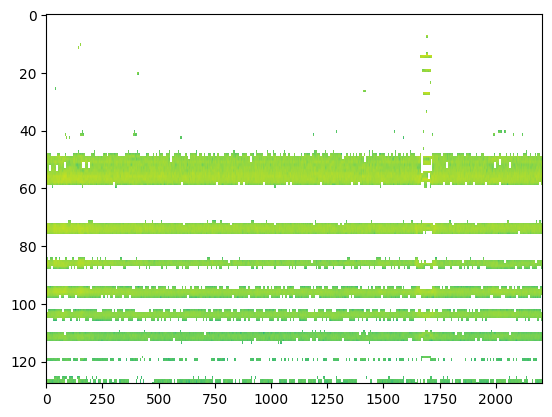

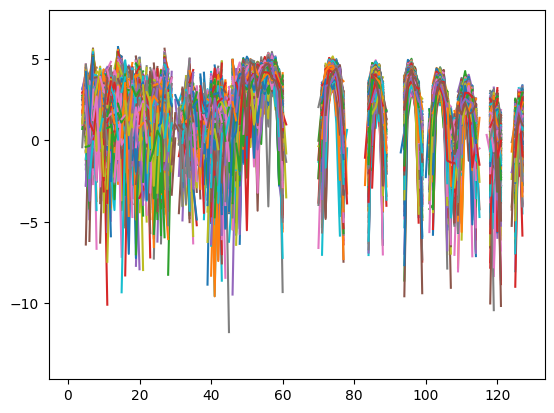

In [18]:
show_mfcc(screaming_waveform,  screaming_sample_rate)

Shape of spectrogram: torch.Size([2, 128, 2206])


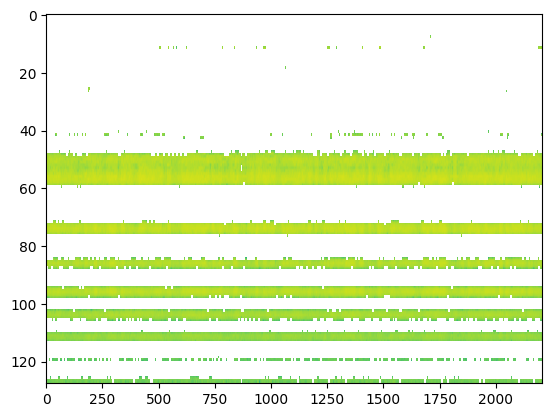

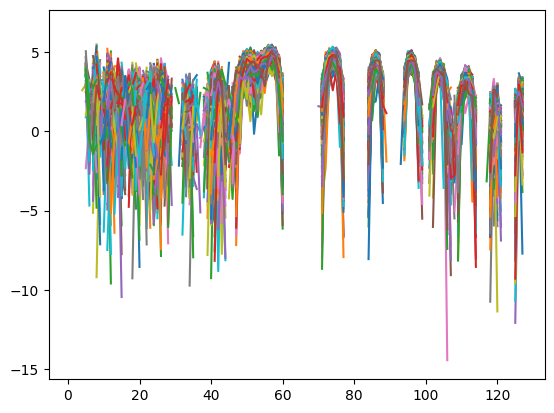

In [19]:
show_mfcc(not_screaming_waveform,  not_screaming_sample_rate)

# Preprogress for the audio

In [20]:
def pad_waveform(waveform, target_length):
    _, num_channels, current_length = waveform.shape

    if current_length < target_length:
        # Calculate the amount of padding needed
        padding = target_length - current_length
        # Pad the waveform with zeros on the right side
        waveform = torch.nn.functional.pad(waveform, (0, padding))

    return waveform


def create_images(train_loader, label_dir, amplitude_threshold=0.01):
    # Make directory
    directory = f'Data/Images/{label_dir}/'
    if os.path.isdir(directory):
        print("Data exists for", label_dir)
    else:
        os.makedirs(directory, mode=0o777, exist_ok=True)

        for i, data in enumerate(train_loader):
            waveform = data['waveform']

            # Pad waveform to a consistent length of 44100 samples
            waveform = pad_waveform(waveform, 441000)

            # Check if the waveform has sufficient amplitude
            if torch.max(torch.abs(waveform)) > amplitude_threshold:
                # Create transformed waveforms
                spectrogram_tensor = torchaudio.transforms.MelSpectrogram(
                    sample_rate=int(data['sample_rate']),
                    n_mels=64,
                    n_fft=1024,
                )(waveform)

                plt.imsave(f'Data/Images/{label_dir}/audio_img{i}.png', (spectrogram_tensor[0] + 1e-10).log2()[0, :, :].numpy(), cmap='viridis')
            else:
                print(f'Skipping blank waveform {i} in {label_dir}')

In [21]:
from torch.utils.data import DataLoader

train_loader_scream = DataLoader(screaming_dataset, batch_size=1,
                                              shuffle=False, num_workers=0)
train_loader_not_scream = DataLoader(not_screaming_dataset, batch_size=1,
                                             shuffle=False, num_workers=0)

In [22]:
create_images(train_loader_scream, 'scream')

In [23]:
create_images(train_loader_not_scream, 'not')

Skipping blank waveform 185 in not
Skipping blank waveform 1465 in not


# Optional Noise

In [24]:
from torchvision.transforms import Lambda
import torch

def random_time_shift(audio, max_shift_ms=1000, target_length=441000):
    # Calculate the current length of the audio
    current_length = audio.shape[-1]

    # If the audio is longer than the target length, perform random shift
    if current_length >= target_length:
        shift = torch.randint(-max_shift_ms, max_shift_ms, (1,)).item()
        shift_samples = int(shift * 44100 / 1000)  # Assuming a 44.1 kHz sample rate
        if shift_samples >= 0:
            audio = torch.nn.functional.pad(audio, (shift_samples, 0))
            # Cut the audio from the end to fit the target_length
            audio = audio[:, :target_length]
        else:
            audio = torch.nn.functional.pad(audio, (0, -shift_samples))
            # Cut the audio from the front to fit the target_length
            audio = audio[:, -target_length:]
    else:
        # If the audio is shorter than the target length, pad it on both ends
        padding = target_length - current_length
        # Calculate shift_samples to be greater than 0
        shift_samples = torch.randint(1, padding, (1,)).item()

        # Determine the left padding as a random number within the range [0, shift_samples]
        left_padding = torch.randint(0, shift_samples, (1,)).item()
        
        # Calculate the right padding as the difference between padding and left_padding
        right_padding = padding - left_padding

        audio = torch.nn.functional.pad(audio, (left_padding, right_padding))

    return audio

In [25]:
def add_noise(audio, noise_level=0.005):
    noise = noise_level * torch.randn_like(audio)
    noisy_audio = audio + noise
    return noisy_audio

In [26]:
from torchvision.transforms import Compose

def augment_audio(audio):
    transform_audio = Compose([
        Lambda(lambda x: random_time_shift(x))
    ])

    augmented_audio = transform_audio(audio)

    return augmented_audio

In [27]:
shift_audio = augment_audio(screaming_waveform)
shift_audio.shape

torch.Size([2, 441000])

Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0073, -0.0073, -0.0066],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0073, -0.0073, -0.0066]])
Sample rate: 44100
Labels: Test 

Shape of transformed waveform: torch.Size([1, 44100])
Sample rate: 4410.0


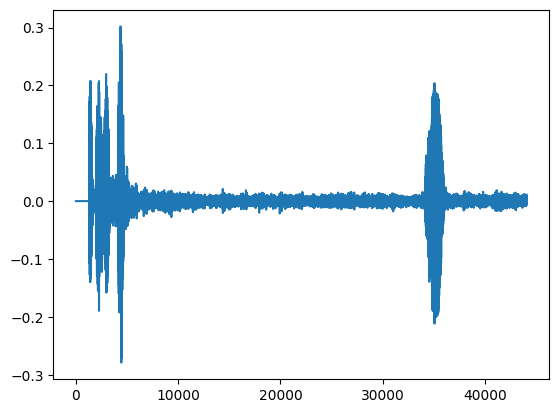

In [28]:
show_waveform(shift_audio, screaming_sample_rate, 'Test')

In [29]:
def create_shift_images(train_loader, label_dir, amplitude_threshold=0.01, shift_time=0):
    for i, data in enumerate(train_loader):
        waveform = data['waveform']

        # Generate shifting audio
        waveform = random_time_shift(waveform)

        # Check if the waveform has sufficient amplitude
        if torch.max(torch.abs(waveform)) > amplitude_threshold:
            # Create transformed waveforms
            spectrogram_tensor = torchaudio.transforms.MelSpectrogram(
                sample_rate=int(data['sample_rate']),
                n_mels=64,
                n_fft=1024,
            )(waveform)

            if spectrogram_tensor[0].log2().isnan().any() or spectrogram_tensor[0].log2().isinf().any():
                continue

            plt.imsave(f'Data/Images/{label_dir}/audio_img{i}_shift{shift_time}.png', spectrogram_tensor[0].log2()[0, :, :].numpy(), cmap='viridis')
        else:
            print(f'Skipping blank waveform {i} in {label_dir}')

    return 'Done!'

# To balance the data for positive we add random shift or noise or even both to increase the data size

In [30]:
# Call the function three times with different shift_time values using list comprehension
[create_shift_images(train_loader_scream, 'scream', shift_time=i) for i in range(5)]

['Done!', 'Done!', 'Done!', 'Done!', 'Done!']